In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from PyCUB import pyCUB 

In [4]:
cub = pyCUB.PyCUB(session = 'ensembl2')
cub.load(session = 'ensembl2',filename = "processed_entropyloc")

working on session: ensembl2
you already have a session here (just a warning)
unzipping utils/save/ensembl2/processed_entropyloc.json.gz
loading from processed_entropyloc
it worked !
you now have 1730558 genes in total


{}

In [13]:
cub.compute_averages(homoset=cub.all_homoset)
cub.all_homoset.compute_ages(preserved=True, minpreserv=0.9, minsimi=0.85)
cub.import_metadataTobias()

homology averages : [ 0.94575969  0.90704492  0.74760554  0.75366192  0.53295894  0.72208115
  0.75023036  0.94839036  0.7018178   0.93271949  0.93613333  0.7916798
  0.77227052  0.92443985  0.92787059  0.94046604  0.68622106  0.95878956]
it was already loaded


Right of the bat we can see that some amino acids are very litlle pushed to an unusual entorpy value. This could be explained by some reasons regarding the general role of this amino acid. But it relatively vary between species. So there is some other factors

In [14]:
for i in [0,1,2,3,514,516,518,519,31]:
    print cub.species[cub.all_homoset.species_namelist[i]].name
    print "----"
    print cub.species[cub.all_homoset.species_namelist[i]].genome_size
    print "----"
    print cub.species[cub.all_homoset.species_namelist[i]].metadata.values()
    print "----"
    print cub.species[cub.all_homoset.species_namelist[i]].average_entropy
    print "----"
    print cub.species[cub.all_homoset.species_namelist[i]].average_size
    print "----"
    print cub.species[cub.all_homoset.species_namelist[i]].meanGChomo
    print "----"
    print cub.species[cub.all_homoset.species_namelist[i]].tot_homologies
    print "----"
    print cub.species[cub.all_homoset.species_namelist[i]].meanecai
    print "----"

zygosaccharomyces_parabailii
----
0
----
[False, False, False, False, False]
----
[ 0.99713756  0.87831888  0.65078921  0.87924324  0.4680413   0.82646651
  0.71837268  0.90754569  0.67130173  0.93496189  0.7856799   0.87781257
  0.895482    0.92527109  0.89828644  0.99631292  0.67750992  0.99677011]
----
543.818181818
----
0.417403998516
----
11
----
None
----
zygosaccharomyces_bailii_isa1307
----
21141148
----
[False, False, False, False, False]
----
[ 0.95672197  0.93119021  0.81624464  0.75445799  0.69771631  0.68561313
  0.82239208  0.97500589  0.79985925  0.89961159  0.95227723  0.73505221
  0.78545465  0.91731267  0.92338721  0.90332481  0.73304146  0.93218957]
----
413.456521739
----
0.464930805223
----
46
----
None
----
stereum_hirsutum_fp_91666_ss1
----
46511623
----
[False, False, False, False, False]
----
[ 0.95478313  0.58655736  0.81346316  0.7389421   0.59974142  0.86121448
  0.74212631  0.9395854   0.75789193  0.81791639  0.93652653  0.88393111
  0.74371465  0.99803411 

In [6]:
secondaryhomo = [0,10,23,26,34,36,176,140,133]
for i in secondaryhomo:
    print cub.working_homoset[i]


homology: YMR186W
size: 550
fullmax: 0.999997500891
var: [ 0.21121859  0.24071136  0.25968812  0.31414914  0.39045027  0.31182216
  0.31384956  0.36758459  0.34430925  0.19857101  0.20017878  0.32471057
  0.30562548  0.21305664  0.15474162  0.22346468  0.35884282  0.19089347]
mean: [ 0.94689828  0.93720271  0.87539785  0.76948469  0.34928762  0.80877176
  0.77452105  0.83315989  0.70108852  0.94941389  0.94607301  0.73493671
  0.81478915  0.94806878  0.95657428  0.9427425   0.7305678   0.95894335]
metrics: {u'silhouette': 0.019158784567542567, u'cal_hara': 9.23972136790517, u'cluster_phylodistance': [1.0043587230156612, 0.7776937334750729, 1.0070891024138091, 1.1877504293073842]}
nans mean: 0.154545454545
lengths mean/var: 663.372727273, 151.73919366
doublon sum: 54
GCcount mean/var: 0.511269728852, 0.0720579496983
KaKs_Scores: None
isrecent: False
ishighpreserved: False
ref: None
refprot: YMR186W
refgene: YMR186W
ecai mean/var: 0.49489271782, 0.0974550502757
cai mean/var: 0.589823682

THis is interesting that this homology has little to do with anything and it should not be a secondary cluster However, we can see that tSNE shows a non linear secondary cluster.
For the seconda one however, there is this notion of clusters that is even more present. Clusters show much more using $$ A_{value}$$
For most of them, there seems to be an equal correlation of the value to nans, cai length and GC whether it is high or low, which also hints on the idea that it is not correlation to the measure in itself.

mRNA abundance seems also to be linked with the secondary cluster presence/outlier cluster presence

Looking at the plot of many homologies, we kinda see different small groups and bigger groups within them. It resembles a lot a small world graph...
If one would overlay previous knowledge about the CUB it seems that different values cluster show the different drivers of the CUB, it can be about the general protein function (with a cluster of one homology). It can be related to the species environment with small clusters and or usage of the protein. 

In [15]:
cub.working_homoset[0].plot('tsne', D=2,interactive=True,correlation=True)

 if you are on a notebook you should write 'from bokeh.io import output_notebook'
similarity_scores: SpearmanrResult(correlation=-0.15984702808231441, pvalue=0.00016691732866527833)
nans: SpearmanrResult(correlation=-0.10446836580972899, pvalue=0.014240595035458457)
ecai: SpearmanrResult(correlation=0.021057431026088324, pvalue=0.62217395694803812)
cai: SpearmanrResult(correlation=0.041378414733043593, pvalue=0.33273634999554524)
lenmat: SpearmanrResult(correlation=-0.059038206659138968, pvalue=0.16677993138434313)
GCcount: SpearmanrResult(correlation=-0.06612591732312488, pvalue=0.12139189160360152)


Loading BokehJS ...

/home/ec2-user/miniconda2/envs/cub/lib/python2.7/site-packages/bokeh/io/saving.py:125: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/home/ec2-user/miniconda2/envs/cub/lib/python2.7/site-packages/bokeh/io/saving.py:138: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


homology: YMR186W
------------------------------------
silhouette: 0.0191587845675
cal_hara: 9.23972136791
cluster_phylodistance: [1.0043587230156612, 0.7776937334750729, 1.0070891024138091, 1.1877504293073842]
------------------------------------
Amino, CUB value mean, variance
ALA: 0.95, 0.045
ARG: 0.94, 0.058
ASN: 0.88, 0.067
ASP: 0.77, 0.099
CYS: 0.35, 0.152
GLN: 0.81, 0.097
GLU: 0.77, 0.099
GLY: 0.83, 0.135
HIS: 0.70, 0.119
ILE: 0.95, 0.039
LEU: 0.95, 0.040
LYS: 0.73, 0.105
PHE: 0.81, 0.093
PRO: 0.95, 0.045
SER: 0.96, 0.024
THR: 0.94, 0.050
TYR: 0.73, 0.129
VAL: 0.96, 0.036
avg similarity Scores
0.842059371533
------------------------------------
mean ecai: 0.49489271782
mean cai: 0.589823682579
abundance of the protein in a cell: 218787
weight of protein: 80899
abundance of mRNA: 6.4
the protein is secreted out of the cell
halflife (in mn): 0.0007
total volume of protein: 95785.0
the pseudo hydrophobicity is of: -0.6
the glucose cost: 673.77
synthesis steps: 3483
the isoelectricp

In [16]:
cub.working_homoset[10].plot('tsne', D=2,interactive=True,correlation=True)

 if you are on a notebook you should write 'from bokeh.io import output_notebook'
similarity_scores: SpearmanrResult(correlation=0.076068123058873977, pvalue=0.10513054355778929)
nans: SpearmanrResult(correlation=-0.24221221416899683, pvalue=1.6911224602957059e-07)
ecai: SpearmanrResult(correlation=-0.085448214477804207, pvalue=0.068608272684168858)
cai: SpearmanrResult(correlation=-0.22626572451796031, pvalue=1.0797287550625028e-06)
lenmat: SpearmanrResult(correlation=0.30854255458769869, pvalue=1.717978755012949e-11)
GCcount: SpearmanrResult(correlation=0.26435558317951335, pvalue=1.0309620818515082e-08)


Loading BokehJS ...

homology: YLR147C
------------------------------------
silhouette: 0.0796058117574
cal_hara: 32.097840548
cluster_phylodistance: [1.0026123455461668, 1.028626831370296, 0.8962667611572063, 0.9259002099834477, 0.7578271750636014, 0.951378176049997]
------------------------------------
Amino, CUB value mean, variance
ALA: 0.84, 0.119
ARG: 0.91, 0.085
ASN: 0.72, 0.064
ASP: 0.79, 0.054
CYS: 0.03, 0.016
GLN: 0.73, 0.077
GLU: 0.68, 0.072
GLY: 0.91, 0.075
HIS: 0.66, 0.035
ILE: 0.90, 0.074
LEU: 0.81, 0.153
LYS: 0.75, 0.067
PHE: 0.66, 0.047
PRO: 0.53, 0.242
SER: 0.47, 0.248
THR: 0.88, 0.089
TYR: 0.49, 0.047
VAL: 0.94, 0.045
avg similarity Scores
0.674211377065
------------------------------------
mean ecai: 0.587832152665
mean cai: 0.572484847402
abundance of the protein in a cell: 0.0
weight of protein: 11224
abundance of mRNA: 1.2
halflife (in mn): nan
total volume of protein: 13328.9
the pseudo hydrophobicity is of: -0.382291666667
the glucose cost: 92.07
synthesis steps: 497
the isoelectric

In [17]:
cub.working_homoset[23].plot('tsne', D=2,interactive=True,correlation=True)

 if you are on a notebook you should write 'from bokeh.io import output_notebook'
similarity_scores: SpearmanrResult(correlation=0.083325425568418557, pvalue=0.055688760565223074)
nans: SpearmanrResult(correlation=-0.20927285775117196, pvalue=1.2275079346383025e-06)
ecai: SpearmanrResult(correlation=-0.07973547028447453, pvalue=0.067137108129112444)
cai: SpearmanrResult(correlation=-0.22436131828136385, pvalue=1.8907023119451286e-07)
lenmat: SpearmanrResult(correlation=0.22989121815308028, pvalue=9.2085745220376132e-08)
GCcount: SpearmanrResult(correlation=0.22653650963369912, pvalue=1.4278313085086705e-07)


Loading BokehJS ...

homology: YDL046W
------------------------------------
silhouette: 0.0920315361753
cal_hara: 28.3819986672
cluster_phylodistance: [1.0064131983336058, 1.1363601011083024, 1.003642183120282, 0.9544638941877908, 1.0158370600816644]
------------------------------------
Amino, CUB value mean, variance
ALA: 0.96, 0.032
ARG: 0.26, 0.189
ASN: 0.77, 0.082
ASP: 0.78, 0.095
CYS: 0.78, 0.047
GLN: 0.63, 0.128
GLU: 0.74, 0.111
GLY: 0.95, 0.043
HIS: 0.34, 0.113
ILE: 0.96, 0.027
LEU: 0.93, 0.063
LYS: 0.83, 0.071
PHE: 0.72, 0.084
PRO: 0.96, 0.030
SER: 0.87, 0.109
THR: 0.95, 0.041
TYR: 0.73, 0.071
VAL: 0.98, 0.015
avg similarity Scores
0.673438786028
------------------------------------
mean ecai: 0.629195171956
mean cai: 0.61670577174
abundance of the protein in a cell: 7124
weight of protein: 19063
abundance of mRNA: 2.4
number of cys_elements: 4
the protein is secreted out of the cell
halflife (in mn): 0.0016
total volume of protein: 23902.8
the pseudo hydrophobicity is of: 0.0116279069767
the gluco

In [21]:
cub.working_homoset['YDR064W'].plot('tsne', D=2,interactive=True,correlation=True)

 if you are on a notebook you should write 'from bokeh.io import output_notebook'
similarity_scores: SpearmanrResult(correlation=0.10579774168045113, pvalue=0.015107180589332879)
nans: SpearmanrResult(correlation=0.11705479443879567, pvalue=0.0071443757244683903)
ecai: SpearmanrResult(correlation=-0.027490292444301248, pvalue=0.52889031204164461)
cai: SpearmanrResult(correlation=-0.094525244238651773, pvalue=0.03003152755836707)
lenmat: SpearmanrResult(correlation=0.18210319575558237, pvalue=2.6023141277584576e-05)
GCcount: SpearmanrResult(correlation=0.08237207749156554, pvalue=0.058798735052638711)


Loading BokehJS ...

homology: YDR064W
------------------------------------
silhouette: 0.31837731494
cal_hara: 49.219076343
cluster_phylodistance: [1.0124431935897884, 1.0036369714073807, 0.9945149305527152, 1.0202334794870385, 1.071090817608709]
------------------------------------
Amino, CUB value mean, variance
ALA: 0.99, 0.010
ARG: 0.92, 0.073
ASN: 0.76, 0.048
ASP: 0.89, 0.031
CYS: 0.04, 0.026
GLN: 0.79, 0.044
GLU: 0.89, 0.037
GLY: 0.99, 0.012
HIS: 0.85, 0.028
ILE: 0.99, 0.010
LEU: 0.91, 0.084
LYS: 0.90, 0.051
PHE: 0.41, 0.123
PRO: 0.97, 0.025
SER: 0.94, 0.052
THR: 0.98, 0.017
TYR: 0.90, 0.035
VAL: 0.98, 0.014
avg similarity Scores
0.853605850017
------------------------------------
mean ecai: 0.695927068107
mean cai: 0.565470081034
high preserved protein
abundance of the protein in a cell: 118213
weight of protein: 17029
abundance of mRNA: 18.6
the protein is secreted out of the cell
halflife (in mn): 0.0011
total volume of protein: 20505.2
the pseudo hydrophobicity is of: -0.331506849315
the glucose

In [19]:
cub.get_subset(homoset = cub.working_homoset, withcopy=True, clusternb=None, species=None,
               homologies=[cub.working_homoset.homo_namelist[i] for i in secondaryhomo]
              ).compare_clusters(cubdistance_matrix=True, plot=True, size=40)

loaded
loaded


Loading BokehJS ...

Loading BokehJS ...

In [33]:
cub.loadspeciestable()

it worked !


In [23]:
cub.get_subset(homoset = cub.working_homoset, withcopy=True, clusternb=None, species=None,
               homologies=[cub.working_homoset.homo_namelist[i] for i in secondaryhomo[:6]]).plot_all(With='tsne', perplexity=60,
                                         interactive=True, iteration=300)

loaded
loaded


Loading BokehJS ...

Here it tends to be mostly the lengths and number of NaN values that seem to be corelated with the entropy values. If they are correlated to the first cluster, they don't explain all the other ones.

Compared to other metrics, it seems to be for now the best one for clustering and finding clusters etc..

In [7]:
outlierhomo = [5,14,39,41,25,58,64,74,80,97,98,101,103,104]
for i in outlierhomo:
    print cub.working_homoset[i]


homology: YPR052C
size: 484
fullmax: 0.999997489229
var: [ 0.12600185  0.3758163   0.26945609  0.32290618  0.18647268  0.31966766
  0.35699373  0.22106814  0.22812729  0.36171509  0.36135954  0.28173583
  0.15378254  0.35405264  0.48896603  0.49489454  0.21557938  0.45808483]
mean: [ 0.98156169  0.82768865  0.73319227  0.73376989  0.05137147  0.61011111
  0.75838371  0.94154817  0.07399011  0.17552821  0.15474185  0.85834929
  0.72220873  0.84231322  0.40021117  0.48372628  0.76172848  0.3113383 ]
metrics: {u'silhouette': -0.006127996130373387, u'cal_hara': 15.464467804328489, u'cluster_phylodistance': [1.0033101331757437, 1.1036555780798245, 1.0606560101026885, 1.0150504077026956, 0.9495231199368648, 0.8414425262976813, 1.0367673612265018, 0.7338592934764547, 0.9173241168455684, 0.6142795425305145, 0.9746568741484164]}
nans mean: 1.7458677686
lengths mean/var: 110.714876033, 47.2568297765
doublon sum: 32
GCcount mean/var: 0.548468708317, 0.0659702089931
KaKs_Scores: None
isrecent: Fa

In [34]:
cub.working_homoset[5].plot('tsne', D=2,interactive=True,correlation=True)

 if you are on a notebook you should write 'from bokeh.io import output_notebook'
similarity_scores: SpearmanrResult(correlation=-0.070792112705935481, pvalue=0.11986243176343638)
nans: SpearmanrResult(correlation=-0.42059979480032095, pvalue=3.5957315591532513e-22)
ecai: SpearmanrResult(correlation=-0.11806904511575923, pvalue=0.009325036402224764)
cai: SpearmanrResult(correlation=-0.071890358036320975, pvalue=0.11421164638167597)
lenmat: SpearmanrResult(correlation=0.42804525409484651, pvalue=5.5178025604692621e-23)
GCcount: SpearmanrResult(correlation=0.015891679431147103, pvalue=0.72728829611480861)


Loading BokehJS ...

homology: YPR052C
------------------------------------
silhouette: -0.00612799613037
cal_hara: 15.4644678043
cluster_phylodistance: [1.0033101331757437, 1.1036555780798245, 1.0606560101026885, 1.0150504077026956, 0.9495231199368648, 0.8414425262976813, 1.0367673612265018, 0.7338592934764547, 0.9173241168455684, 0.6142795425305145, 0.9746568741484164]
------------------------------------
Amino, CUB value mean, variance
ALA: 0.98, 0.016
ARG: 0.83, 0.141
ASN: 0.73, 0.073
ASP: 0.73, 0.104
CYS: 0.05, 0.035
GLN: 0.61, 0.102
GLU: 0.76, 0.127
GLY: 0.94, 0.049
HIS: 0.07, 0.052
ILE: 0.18, 0.131
LEU: 0.15, 0.131
LYS: 0.86, 0.079
PHE: 0.72, 0.024
PRO: 0.84, 0.125
SER: 0.40, 0.239
THR: 0.48, 0.245
TYR: 0.76, 0.046
VAL: 0.31, 0.210
avg similarity Scores
0.812257050336
------------------------------------
mean ecai: 0.776498282103
mean cai: 0.592252365551
abundance of the protein in a cell: 3251.0
weight of protein: 10802
abundance of mRNA: 4.3
halflife (in mn): 0.000891
total volume of protein: 1269

In [36]:
cub.working_homoset[14].plot('tsne', D=2,interactive=True,correlation=True)

 if you are on a notebook you should write 'from bokeh.io import output_notebook'
similarity_scores: SpearmanrResult(correlation=-0.056817674870850376, pvalue=0.20836000240005659)
nans: SpearmanrResult(correlation=-0.39803122016203385, pvalue=3.9754782355307412e-20)
ecai: SpearmanrResult(correlation=0.16328502680745435, pvalue=0.00027576475430247596)
cai: SpearmanrResult(correlation=-0.089018302220878379, pvalue=0.048447932653799514)
lenmat: SpearmanrResult(correlation=0.43207324673915537, pvalue=8.5192368836702005e-24)
GCcount: SpearmanrResult(correlation=0.037584279363295073, pvalue=0.40550318325433032)


Loading BokehJS ...

homology: YBR089C-A
------------------------------------
silhouette: 0.11192530708
cal_hara: 23.206754635
cluster_phylodistance: [0.9958278842645163, 0.7605439170470437, 0.9674431713243354, 0.9398491496015309, 0.9538014622511075, 0.9987520118202686, 1.0050137799194552, 0.8616170216915235, 0.9614423102292815, 0.8495132054563205, 1.0504115986385583]
------------------------------------
Amino, CUB value mean, variance
ALA: 0.98, 0.022
ARG: 0.84, 0.131
ASN: 0.76, 0.071
ASP: 0.82, 0.065
CYS: 0.05, 0.030
GLN: 0.61, 0.105
GLU: 0.87, 0.069
GLY: 0.94, 0.055
HIS: 0.07, 0.050
ILE: 0.19, 0.137
LEU: 0.15, 0.130
LYS: 0.89, 0.061
PHE: 0.70, 0.035
PRO: 0.91, 0.071
SER: 0.39, 0.236
THR: 0.49, 0.245
TYR: 0.73, 0.052
VAL: 0.32, 0.213
avg similarity Scores
0.774595152167
------------------------------------
mean ecai: 0.615944950508
mean cai: 0.594634859274
abundance of the protein in a cell: 4879.0
weight of protein: 11575
abundance of mRNA: 0.3
halflife (in mn): 0.00673
total volume of protein: 13318.0


In [40]:
cub.working_homoset['YBR089C-A'].plot('tsne', D=2,interactive=True,correlation=True)

 if you are on a notebook you should write 'from bokeh.io import output_notebook'
similarity_scores: SpearmanrResult(correlation=-0.056817674870850376, pvalue=0.20836000240005659)
nans: SpearmanrResult(correlation=-0.39803122016203385, pvalue=3.9754782355307412e-20)
ecai: SpearmanrResult(correlation=0.16328502680745435, pvalue=0.00027576475430247596)
cai: SpearmanrResult(correlation=-0.089018302220878379, pvalue=0.048447932653799514)
lenmat: SpearmanrResult(correlation=0.43207324673915537, pvalue=8.5192368836702005e-24)
GCcount: SpearmanrResult(correlation=0.037584279363295073, pvalue=0.40550318325433032)


Loading BokehJS ...

homology: YBR089C-A
------------------------------------
silhouette: 0.11192530708
cal_hara: 23.206754635
cluster_phylodistance: [0.9958278842645163, 0.7605439170470437, 0.9674431713243354, 0.9398491496015309, 0.9538014622511075, 0.9987520118202686, 1.0050137799194552, 0.8616170216915235, 0.9614423102292815, 0.8495132054563205, 1.0504115986385583]
------------------------------------
Amino, CUB value mean, variance
ALA: 0.98, 0.022
ARG: 0.84, 0.131
ASN: 0.76, 0.071
ASP: 0.82, 0.065
CYS: 0.05, 0.030
GLN: 0.61, 0.105
GLU: 0.87, 0.069
GLY: 0.94, 0.055
HIS: 0.07, 0.050
ILE: 0.19, 0.137
LEU: 0.15, 0.130
LYS: 0.89, 0.061
PHE: 0.70, 0.035
PRO: 0.91, 0.071
SER: 0.39, 0.236
THR: 0.49, 0.245
TYR: 0.73, 0.052
VAL: 0.32, 0.213
avg similarity Scores
0.774595152167
------------------------------------
mean ecai: 0.615944950508
mean cai: 0.594634859274
abundance of the protein in a cell: 4879.0
weight of protein: 11575
abundance of mRNA: 0.3
halflife (in mn): 0.00673
total volume of protein: 13318.0


We can really see that there is differences amongst homologies with a lot of secondary clusters and others here. Moreover we can see in the full plot of mulitple homologies that most principal clusters are in their own region, as if principaly influenced by factors related to the underlying protein, then there is small clusters that are shared by all homology groups and that contain either similar species, either similar 

In [38]:
cub.get_subset(homoset = cub.working_homoset, withcopy=True, clusternb=None, species=None,
               homologies=cub.working_homoset.homo_namelist[:40]
              ).compare_clusters(cubdistance_matrix=True, plot=True, size=40)

loaded
loaded


Loading BokehJS ...

Loading BokehJS ...

In [41]:
cub.get_subset(homoset = cub.working_homoset, withcopy=True, clusternb=None, species=None,
               homologies=[cub.working_homoset.homo_namelist[i] for i in outlierhomo[:6]]).plot_all(With='tsne', perplexity=60,
                                         interactive=True, iteration=300)

loaded
loaded


Loading BokehJS ...

In [8]:
primaryhomo = [3110,3120,3130,3140,3150,3160,3161,3164,3167,3170,3171]
for i in primaryhomo:
    print cub.working_homoset[i]


homology: YJR009C
size: 620
fullmax: 0.999997500891
var: [ 0.1605429   0.2306779   0.27596677  0.30148098  0.24817648  0.30097619
  0.26051827  0.23453226  0.24076012  0.15257021  0.23353858  0.26641708
  0.32792326  0.15962968  0.1934543   0.20847594  0.33220494  0.17658028]
mean: [ 0.97020101  0.94305416  0.84974489  0.79910089  0.65009995  0.71307417
  0.87368192  0.93741838  0.84809251  0.96621631  0.93775429  0.86915756
  0.77232091  0.9709427   0.95741182  0.95243026  0.7865632   0.96426664]
metrics: {u'silhouette': 0.11350662099142274, u'cal_hara': 16.503305936881024, u'cluster_phylodistance': [1.0231283001715883, 1.0009355908897792, 0.933388446510322, 1.0040996924580736, 0.933388446510322]}
nans mean: 0.0274193548387
lengths mean/var: 321.346774194, 53.0378204004
doublon sum: 123
GCcount mean/var: 0.535371536514, 0.0637241032325
KaKs_Scores: None
isrecent: False
ishighpreserved: False
ref: None
refprot: YJR009C
refgene: YJR009C
ecai mean/var: 0.763039372899, 0.0806372128046
ca

In [42]:
cub.working_homoset[3120].plot('tsne', D=2,interactive=True,correlation=True)

 if you are on a notebook you should write 'from bokeh.io import output_notebook'
similarity_scores: SpearmanrResult(correlation=0.0371730540226008, pvalue=0.28592102682190379)
nans: SpearmanrResult(correlation=-0.10419323606742718, pvalue=0.0027161042246365901)
ecai: SpearmanrResult(correlation=-0.054798878661751413, pvalue=0.11555007679193391)
cai: SpearmanrResult(correlation=-0.16789221953558919, pvalue=1.2195465121695145e-06)
lenmat: SpearmanrResult(correlation=0.1112294842727367, pvalue=0.0013654399651707328)
GCcount: SpearmanrResult(correlation=0.17078327176356722, pvalue=7.9239682671512234e-07)


Loading BokehJS ...

homology: YLR142W
------------------------------------
silhouette: 0.0976265729816
cal_hara: 19.2277359845
cluster_phylodistance: [0.9744808755076986, 1.003551769094611, 0.9728708890807559]
------------------------------------
Amino, CUB value mean, variance
ALA: 0.95, 0.040
ARG: 0.95, 0.036
ASN: 0.80, 0.092
ASP: 0.81, 0.082
CYS: 0.77, 0.073
GLN: 0.79, 0.095
GLU: 0.84, 0.083
GLY: 0.94, 0.054
HIS: 0.78, 0.084
ILE: 0.96, 0.029
LEU: 0.92, 0.048
LYS: 0.82, 0.090
PHE: 0.76, 0.110
PRO: 0.95, 0.045
SER: 0.93, 0.045
THR: 0.95, 0.042
TYR: 0.78, 0.101
VAL: 0.97, 0.030
avg similarity Scores
0.580503754161
------------------------------------
mean ecai: 0.559354761716
mean cai: 0.589510403015
abundance of the protein in a cell: 154.0
weight of protein: 53271
abundance of mRNA: 0.5
halflife (in mn): 0.000891
total volume of protein: 64688.9
the pseudo hydrophobicity is of: -0.223010752688
the glucose cost: 454.59
synthesis steps: 2469
the isoelectricpoint(Pi) is : 6.97


For homology {YBL003C,YDR225W} there seems to be 2-3 very distinct clusters, they have not been catched by the clustering but by tSNE. Something that might explain this

In [186]:
cub.loadspeciestable()

it worked !


In [187]:
cub.working_homoset['YBL003C'].plot('pca', D=2,interactive=True,correlation=True)

 if you are on a notebook you should write 'from bokeh.io import output_notebook'
similarity_scores: SpearmanrResult(correlation=0.37483760198015076, pvalue=7.7121359818286199e-25)
nans: SpearmanrResult(correlation=-0.10806248167061397, pvalue=0.0041511485637422685)
ecai: SpearmanrResult(correlation=0.010218256542274859, pvalue=0.78696010067632338)
cai: SpearmanrResult(correlation=-0.017079558552661085, pvalue=0.65144603963385839)
lenmat: SpearmanrResult(correlation=-0.15684365422195573, pvalue=2.9920382844967417e-05)
GCcount: SpearmanrResult(correlation=0.044066508556495902, pvalue=0.24359812284101062)


Loading BokehJS ...

homology: YBL003C
------------------------------------
silhouette: 0.134421700951
cal_hara: 22.7741112286
cluster_phylodistance: [0.9489608495206535, 1.0031437995176056, 0.7330247926503913, 0.8074726231539466, 1.0136358460868693, 0.5936737252975826]
------------------------------------
Amino, CUB value mean, variance
ALA: 0.97, 0.028
ARG: 0.99, 0.007
ASN: 0.88, 0.047
ASP: 0.60, 0.032
CYS: 0.01, 0.005
GLN: 0.85, 0.053
GLU: 0.80, 0.086
GLY: 0.93, 0.066
HIS: 0.71, 0.049
ILE: 0.99, 0.007
LEU: 0.94, 0.057
LYS: 0.82, 0.088
PHE: 0.11, 0.052
PRO: 0.94, 0.049
SER: 0.96, 0.039
THR: 0.61, 0.230
TYR: 0.73, 0.014
VAL: 0.99, 0.011
avg similarity Scores
0.908444448356
------------------------------------
mean ecai: 0.652713464588
mean cai: 0.615348481329
high preserved protein
abundance of the protein in a cell: 39212.0
weight of protein: 13989
abundance of mRNA: 10.1
halflife (in mn): 0.004151
total volume of protein: 17254.5
the pseudo hydrophobicity is of: -0.332824427481
the glucose cost: 118.77


In [54]:
cub.working_homoset['YMR121C'].plot('tsne', D=2,interactive=True,correlation=True)

 if you are on a notebook you should write 'from bokeh.io import output_notebook'
similarity_scores: SpearmanrResult(correlation=0.045255382799603602, pvalue=0.31011147342294748)
nans: SpearmanrResult(correlation=-0.080488084645829738, pvalue=0.070731805083924348)
ecai: SpearmanrResult(correlation=-0.015135724467302483, pvalue=0.7343764607186829)
cai: SpearmanrResult(correlation=-0.051478028866851711, pvalue=0.24820353133591458)
lenmat: SpearmanrResult(correlation=0.14009461817731003, pvalue=0.0015994284596261669)
GCcount: SpearmanrResult(correlation=0.075505049891718148, pvalue=0.090079126599269893)


Loading BokehJS ...

homology: YMR121C
------------------------------------
silhouette: 0.223301491637
cal_hara: 13.2400501282
cluster_phylodistance: [1.0158336221861963, 0.9871599055156934]
------------------------------------
Amino, CUB value mean, variance
ALA: 0.99, 0.012
ARG: 0.98, 0.017
ASN: 0.85, 0.068
ASP: 0.83, 0.042
CYS: 0.50, 0.069
GLN: 0.70, 0.127
GLU: 0.82, 0.074
GLY: 0.99, 0.010
HIS: 0.84, 0.051
ILE: 0.98, 0.012
LEU: 0.96, 0.036
LYS: 0.75, 0.093
PHE: 0.55, 0.108
PRO: 0.96, 0.036
SER: 0.99, 0.012
THR: 0.97, 0.021
TYR: 0.76, 0.143
VAL: 0.98, 0.022
avg similarity Scores
0.903810096938
------------------------------------
mean ecai: 0.582255147087
mean cai: 0.54797246284
high preserved protein
abundance of the protein in a cell: 605.0
weight of protein: 24422
abundance of mRNA: 6.0
halflife (in mn): 0.0
total volume of protein: 28132.4
the pseudo hydrophobicity is of: -1.21212121212
the glucose cost: 206.37
synthesis steps: 1143
the isoelectricpoint(Pi) is : 6.97


In [56]:
cub.get_subset(homoset = cub.working_homoset, withcopy=True, clusternb=None, species=None,
               homologies=cub.working_homoset.homo_namelist[-40:]
              ).compare_clusters(cubdistance_matrix=True, plot=True, size=40)

loaded
loaded


Loading BokehJS ...

Loading BokehJS ...

In [49]:
cub.get_subset(homoset = cub.working_homoset, withcopy=True, clusternb=None, species=None,
               homologies=[cub.working_homoset.homo_namelist[i] for i in primaryhomo[:6]]).plot_all(
                                        With='tsne', perplexity=60,
                                         interactive=True, iteration=300)

loaded
loaded


Loading BokehJS ...

In [ ]:
cub.all_homoset[2].plot('tsne', D=2,interactive=True)

In [ ]:
cub.all_homoset[2].plot('tsne', D=2,interactive=True)

In [ ]:
cub.get_evolutionary_distance()

In [ ]:
cub.get_subset(homoset = cub.all_homoset, withcopy=T, clusternb=None, species=None,
               homologies=cub.all_homoset.homo_namelist[:100]).find_clusters(clustering='dbscan',
                    trainingset=30, epoch=30, ranges=[0.1, 3], size=10, redo = True,
                    homogroupnb=2, best_eps = True, assess= True, eps=0.45)

In [ ]:
cub.get_subset(homoset = cub.all_homoset, withcopy=False, clusternb=None, species=None,
               homologies=cub.all_homoset.homo_namelist[:600]).find_clusters(clustering='dbscan',
                    trainingset=150, epoch=30, ranges=[0.1, 4], size=10, redo = True,
                    homogroupnb=2, best_eps = True, assess= True, eps=0.45)

In [61]:
cub.get_full_genomes(kingdom='fungi', seq='cds', avg=True, by="entropy", normalized=False)

parsed 1 over 66 done aspergillus_clavatus
parsed 2 over 66 done aspergillus_flavus
parsed 3 over 66

KeyboardInterrupt: 

In [165]:
cub.save("processed_ent_loc")

writing in processed_ent_loc
it worked !


In [209]:
cub.getRelation2G3DD(homomean=True,euclide=True)

> /home/ec2-user/PyCUB/CodonUsageBias/PyCUB/pyCUB.py(1642)getRelation2G3DD()
-> link = []
(Pdb) c
> /home/ec2-user/PyCUB/CodonUsageBias/PyCUB/pyCUB.py(1714)getRelation2G3DD()
-> tempchrom = 0
(Pdb) n
> /home/ec2-user/PyCUB/CodonUsageBias/PyCUB/pyCUB.py(1715)getRelation2G3DD()
-> tempind = 0
(Pdb) n
> /home/ec2-user/PyCUB/CodonUsageBias/PyCUB/pyCUB.py(1716)getRelation2G3DD()
-> tempdf = df.loc[df['chr1'] == 1]
(Pdb) j 1880
> /home/ec2-user/PyCUB/CodonUsageBias/PyCUB/pyCUB.py(1880)getRelation2G3DD()
-> # if tempchrom + 1 == val['chr1']
(Pdb) shortestpath = np.load('npys/shortestpath_jerem.npy')
(Pdb) unt
> /home/ec2-user/PyCUB/CodonUsageBias/PyCUB/pyCUB.py(1888)getRelation2G3DD()
-> distcuf = np.zeros((len(positions), len(positions)), dtype=float)
(Pdb) 
> /home/ec2-user/PyCUB/CodonUsageBias/PyCUB/pyCUB.py(1889)getRelation2G3DD()
-> distcub = np.zeros((len(positions), len(positions)), dtype=float)
(Pdb) 
> /home/ec2-user/PyCUB/CodonUsageBias/PyCUB/pyCUB.py(1890)getRelation2G3DD()
-> dist

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(Pdb) n
> /home/ec2-user/PyCUB/CodonUsageBias/PyCUB/pyCUB.py(1935)getRelation2G3DD()
-> elif use == "diament2":
(Pdb) np.save('npys/distval-loc',distent)
(Pdb) c


(0.44650853756252862,
 1.3470576382137763e-98,
 0.59963739504768032,
 1.386413533191727e-195,
 0.75864680930450634,
 0.0)

In [ ]:
print cub.species[cub.species.keys()[0]]

[autoreload of PyCUB.pyCUB failed: Traceback (most recent call last):
  File "/home/ec2-user/miniconda2/envs/cub/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "PyCUB/pyCUB.py", line 1223
    else print "no phylo distances"
             ^
SyntaxError: invalid syntax
]
[autoreload of PyCUB.pyCUB failed: Traceback (most recent call last):
  File "/home/ec2-user/miniconda2/envs/cub/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "PyCUB/pyCUB.py", line 1223
    else print "no phylo distances"
             ^
SyntaxError: invalid syntax
]


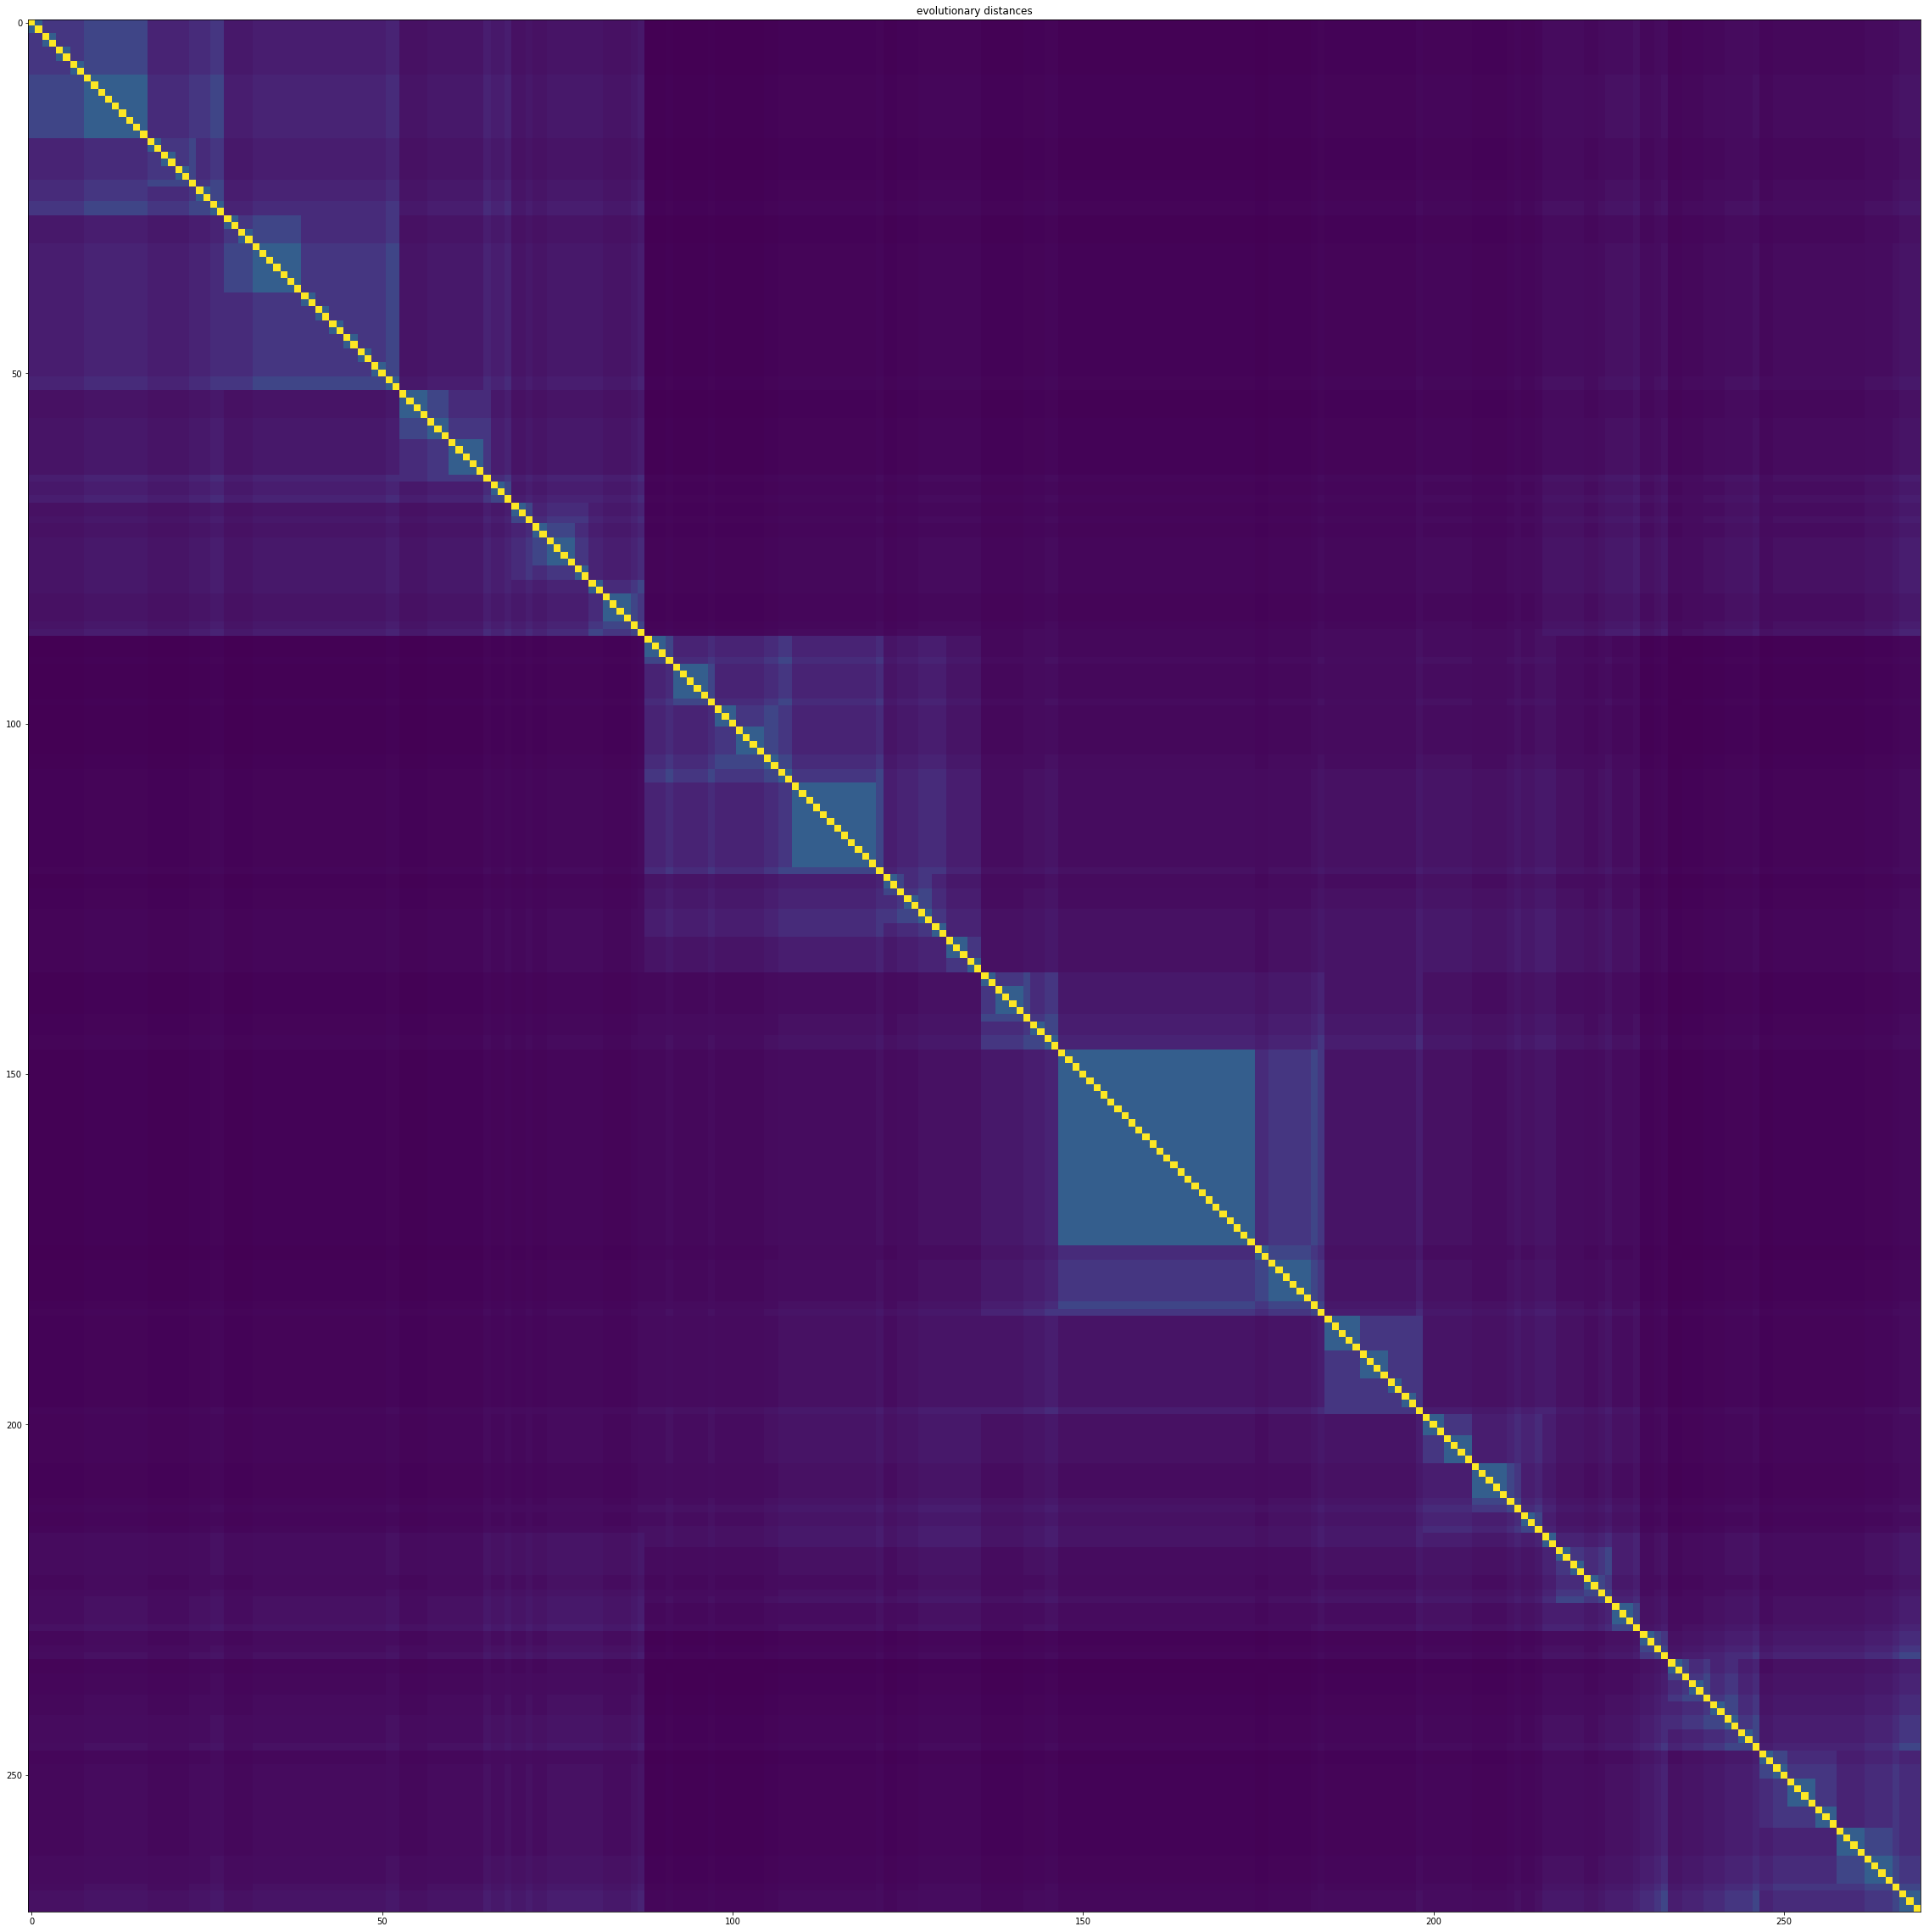

In [72]:
cub.get_evolutionary_distance()

The species with the highest variance seems to be all surrounding the one with less variance in their CUB, species satoella_complicata seems to be far outside the regular cluster. In PCA there really seems to be an elongated shape meaning that one dimension contains way more variance than any other. 
Plant symbiotic species seem to cluster more toward low entropy, low variance values.
Only one part of the plot seems to have brown rot bacteria but this is of low statistical significance.

In [110]:
cub.compare_species(showvar=True, to="avg", reducer='tsne', perplexity=100, eps=0.5, size=15)

we have 284 species with sufficient statistics in their tRNA values
no phylo distances


PyCUB/pyCUB.py:1195: RuntimeWarning: divide by zero encountered in log
  utils.rgb2hex((126, 8, 10 + np.floor(246 * dist / tRNAentropydist.max()))) for dist in np.log(np.ma.masked_equal(tRNAentropydist, 0))]
PyCUB/pyCUB.py:1201: RuntimeWarning: divide by zero encountered in log
  tRNA_number=tRNA_number,


Loading BokehJS ...

it really seems to be difficult to regress on that low number of datapoint, we achieve a low score, which may be the maximum given the probably low correlation.
We can see that the average size correlates with the CUB which makes sense given the measure we use. Moreover the GCcount seems to be really important for the regressor algorithm. finally, we have a small inverse correlation of the CUB to the total number of homology (maybe that the highly shared/conserved genes tend to be ones which codon usage bias is little influenced by exterior factors. 

In [ ]:
cub.regress_on_species(without=[], full=False, onlyhomo=False, perctrain=0.8, algo="lasso",
                           eps=0.001, n_alphas=100)

In [86]:
cub.scorespecies

0.2555102083452766

What a strangely well defined shape. we can see a cluster of high mean eCAI homologies: a form of preservation which is also a place where the mean entropy is the lowest.

Homologies with a high cost/length  also seem to cluster together around one point of high entropy (but not the highest). 

a correlated thing is the number of cys regulatory elements to the length and cost of the gene. 

secreted homologies seem to sometimes be more clustered than non secreted ones. 

High mRNA abundances seems to be mostly clustered on the outside of the plot. we can also see just how many. 

Some low entropy homologies also seem to be driven by a lot of NaN values. 

similarity score seems to be influenced by the length (which is not trivial) And there also seems to be some clusters of higher similarity and the one of low entorpy highlited earlier. 

Moreover, it is the one that has been left out as outlier by DBSCAN. 

Most homologies seems to have high entropy and the others seem only to be a few (may be a lot of outliers due to all homoset

we can see an important cluster in PCA displaying the influence of hydrophobicity on the homologies.

* it is interesting that despite looking at averages over many different genes of different species, such relation exist despite looking mostly at the metadata of only SC*

#### DOING working
The shape is now way more rounded than before. and some of the clusters we had spotted earlier have disapeared. we have mostly the same correlation as before


In [188]:
cub.compare_homologies(homoset=cub.working_homoset, homosapiens=False,
                       mindistance=10, preserved=True,
                           size=4,
                           varsize=6, minpreserv=0.9, minsimi=0.9, showvar=True,
                       eps=0.8,
                       reducer='tsne', perplexity=100)

> /home/ec2-user/PyCUB/CodonUsageBias/PyCUB/pyCUB.py(1402)compare_homologies()
-> averagehomo_matrix = np.zeros((len(homoset), utils.CUBD))
(Pdb) c


/home/ec2-user/miniconda2/envs/cub/lib/python2.7/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('GCcount', 3172), ('clusters', 3172), ('color', 3172), ('conservation', 3172), ('cys_elements', 3172), ('decay_rate', 3172), ('glucose_cost', 3172), ('homologies', 3172), ('is_secreted', 3172), ('isoelectricpoint', 3172), ('lenmat', 3172), ('mRNA_abundance', 3172), ('mean_hydrophobicity', 3172), ('meancai', 3172), ('meanecai', 3172), ('meanentropy', 3172), ('nans', 3172), ('protein_abundance', 3172), ('recent', 3172), ('similarity_scores', 3172), ('size', 5807), ('synthesis_steps', 3172), ('tot_volume', 3172), ('weight', 3172), ('x', 3172), ('y', 3172)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


Loading BokehJS ...

The results are pretty grim for this regression algorithm, there is traces of hope however, some important correlation have been found and we can see an almost linear increase of the r^2 score with the increase of datapoint.

Moreover, using only a subset of values that are correlated with the entropy and only using the average CUB, a 2 layer (2*11 neurons) MLP is able to regress on the values with a very good accuracy (0.6 < r^2 < 0.76) this is because of nans values (removing them get's you bacjk to a r^2 of (0.2 - 0.35)

*with have seen that, for regression, the entropy loc seems to be better than regular entropy. Moreover, the NN is also way better than the lasso. removing uncorrelated parameters is also very important*

In [201]:
cub.regress_on_genes(homoset=cub.all_homoset, full=False, without=["conservation","similarity_scores",
                    "mRNA_abundance","protein_abundance","is_secreted",
                    "cys_elements","decay_rate"],
                     perctrain=0.85, algo="nn", eps=0.001, n_alphas=100)

> /home/ec2-user/PyCUB/CodonUsageBias/PyCUB/pyCUB.py(1508)regress_on_genes()
-> for val in values[:5]:
(Pdb) c
nans: SpearmanrResult(correlation=-0.67673563479785559, pvalue=0.0)
lenmat: SpearmanrResult(correlation=0.61317143434654797, pvalue=0.0)
GCcount: SpearmanrResult(correlation=0.1042831576169921, pvalue=1.6286476139846346e-15)
weight: SpearmanrResult(correlation=0.59488263810025221, pvalue=0.0)
tot_volume: SpearmanrResult(correlation=0.61404859129722777, pvalue=0.0)
mean_hydrophobicity: SpearmanrResult(correlation=0.12100588754115996, pvalue=2.1802017159482846e-20)
glucose_cost: SpearmanrResult(correlation=0.61905446084924243, pvalue=0.0)
synthesis_steps: SpearmanrResult(correlation=0.62413262866369279, pvalue=0.0)
isoelectricpoint: SpearmanrResult(correlation=0.020678172263525068, pvalue=0.11512218340330567)
meanecai: SpearmanrResult(correlation=-0.31898066567312289, pvalue=1.7902743204999836e-137)
meancai: SpearmanrResult(correlation=-0.11200359394823546, pvalue=1.126779892710

(0.63262741577735615,
 [array([[  1.88511615e-03,  -2.32484272e-02,  -1.11017559e-01,
           -1.05218906e-01,  -8.52262704e-03,  -7.20142044e-01,
            2.72544403e-01,  -1.46249547e-06,   3.62360386e-01,
           -7.91981236e-01,   3.01705837e-01],
         [  3.06142322e-01,   1.21143169e-01,   3.75460332e-02,
            5.62574056e-01,  -3.47368556e-01,   1.64793378e-01,
           -2.11444281e-01,  -1.87555756e-03,  -3.01792280e-01,
            4.51667503e-01,   4.07028199e-01],
         [  4.54670437e-01,  -5.87707215e-04,   1.33412095e-01,
            3.57818040e-01,  -1.85794498e-01,   3.60875861e-02,
           -4.22325603e-01,  -1.50815330e-02,  -3.23197182e-01,
            2.06218052e-01,  -7.85290756e-02],
         [  4.90754457e-01,  -1.47771037e-05,   4.38187191e-01,
            2.66104014e-01,   3.88720536e-01,   5.90088193e-01,
            9.91059064e-02,  -2.25841138e-03,   2.24364041e-01,
           -9.42947866e-02,   4.63973542e-01],
         [  3.44415146

In [184]:
cub.regress_on_genes(homoset=cub.working_homoset, full=False, without=["conservation","similarity_scores",
                    "mRNA_abundance","protein_abundance","is_secreted",
                    "cys_elements","decay_rate"],
                     perctrain=0.85, algo="nn", eps=0.001, n_alphas=100)

IndexError: tuple index out of range